In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


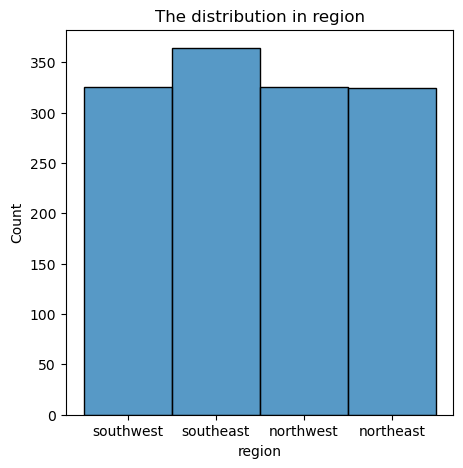

In [39]:
# UniVariate Analysis

plt.figure(figsize = (5,5))
sns.histplot(df["region"])
plt.title("The distribution in region")
plt.show()

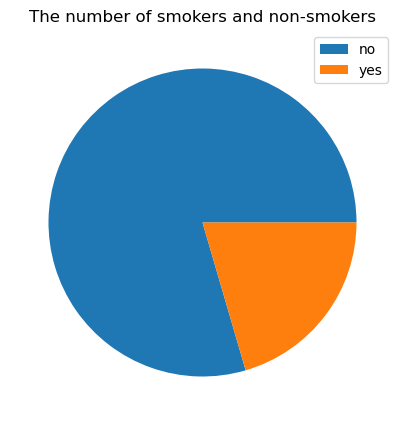

In [40]:
plt.figure(figsize = (5,5))
plt.pie(df["smoker"].value_counts())
plt.legend(["no" , "yes"])
plt.title("The number of smokers and non-smokers")
plt.show()

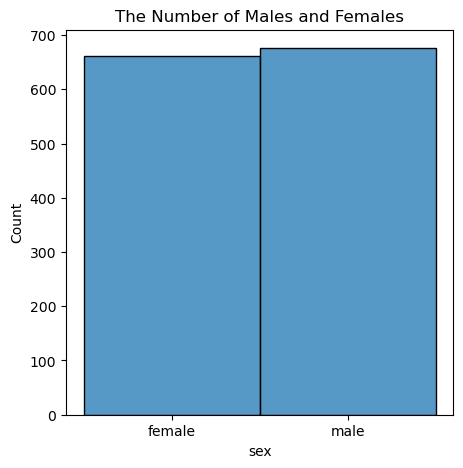

In [41]:
plt.figure(figsize = (5,5))
sns.histplot(df["sex"])
plt.title("The Number of Males and Females")
plt.show()

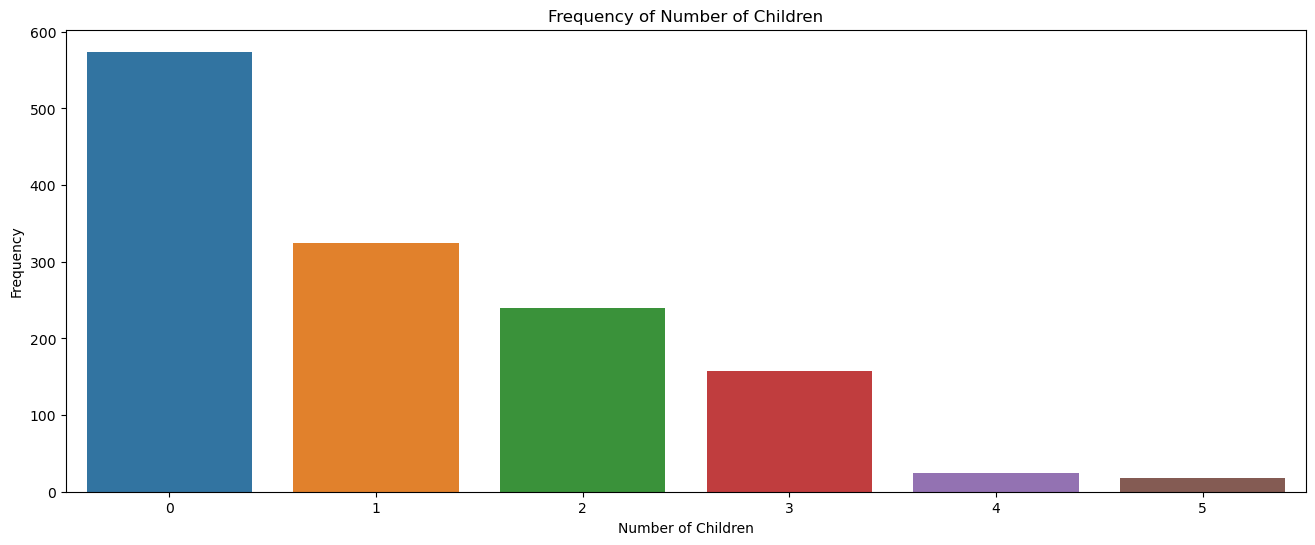

In [42]:
plt.figure(figsize=(16, 6))
sns.countplot(x='children', data=df)
plt.title('Frequency of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Converting Categorical data into Numerical Data

df["smoker"] = df["smoker"].replace({"yes" : 1 , "no" : 0})
df["sex"] = df["sex"].replace({"male" : 0 , "female" : 1})
df["region"] = df["region"].apply({"southwest" : 1 , "southeast" : 2 , "northeast" : 3 , "northwest" : 4}.get)

In [44]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,4,10600.5483
1334,18,1,31.92,0,0,3,2205.9808
1335,18,1,36.85,0,0,2,1629.8335
1336,21,1,25.80,0,0,1,2007.9450
1337,61,1,29.07,0,1,4,29141.3603


In [45]:
#Importing Dictionaries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score

In [46]:
# X and Y variables

y = df["charges"]
df.drop("charges" , axis =1 , inplace = True)
x = df

In [47]:
# Splitting Training and Testing Dataset

xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [48]:
# Building Model

mod = LinearRegression()
mod.fit(xtrain , ytrain)

LinearRegression()

In [49]:
# Predicting Values

pred = mod.predict(xtest)

In [50]:
print("The mean absolute error is " , mean_absolute_error(pred , ytest))
print("The mean squared error is ", mean_squared_error(pred , ytest))
print("rscore:",r2_score(pred,ytest))

The mean absolute error is  4196.963225744939
The mean squared error is  33736500.467603385
rscore: 0.7072661005240635


In [51]:
# Model Building : Linear Regression

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(xtrain, ytrain)

RandomForestRegressor()

In [52]:
y_pred_2 = RFR.predict(xtest)
y_pred_2

array([10591.8756305 ,  5675.5567129 , 28089.2221995 , 10794.5036238 ,
       34763.8605654 ,  8806.4934569 ,  2210.393403  , 14400.019389  ,
        6159.2973353 , 11144.1448146 , 19870.2332681 ,  7485.6514557 ,
        4407.8326534 , 45807.9510728 , 48376.3217307 , 45321.9686679 ,
       10038.7793161 , 42789.069311  ,  8364.343941  , 25461.1983976 ,
        8089.075967  , 11091.8230913 ,  2400.5672657 ,  2318.942515  ,
       11189.6611193 , 11928.7951349 , 13229.7394842 ,  7808.1945089 ,
       10964.6640949 ,  4015.58468162,  7949.7355508 , 11964.9649686 ,
        2269.354773  ,  5939.7856985 ,  3228.5310943 , 10788.419711  ,
        2499.7916482 ,  8781.5515075 , 23537.781324  , 39458.2614669 ,
        5114.6075131 ,  3599.8083807 , 12032.9317472 , 14768.2959431 ,
        6112.2735655 , 15971.6078938 , 19046.9121056 ,  7725.2974664 ,
       42099.722604  ,  6848.8668269 , 13833.889516  ,  2325.82970445,
        7011.3914362 ,  1730.367613  , 11905.5064478 , 11030.6096453 ,
      

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_pred_2, ytest)
mse = mean_squared_error(y_pred_2, ytest)
r2 = r2_score(ytest, y_pred_2)
print('Mean absolute error :',mae)
print('Mean squared error :',r2)
print('R^2 :', r2)

Mean absolute error : 2568.6830193312203
Mean squared error : 0.861572851788138
R^2 : 0.861572851788138


In [54]:
# Model Building : gradient boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the model
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBR.fit(xtrain, ytrain)

# Predict on test set
ypred_2 = GBR.predict(xtest)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(ypred_2, ytest)
mse = mean_squared_error(ypred_2, ytest)
r2 = r2_score(ytest, ypred_2)
print('Mean absolute error :',mae)
print('Mean squared error :',r2)
print('R^2 :', r2)

Mean absolute error : 2405.301153425969
Mean squared error : 0.8795222617934118
R^2 : 0.8795222617934118


In [65]:
#Model Creation

model=RandomForestRegressor(n_estimators=100,max_depth=4)

In [66]:
#Training model

model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=4)

In [67]:
#Predicting values with Test Dataset

test_data_predictions=model.predict(xtrain)

In [68]:
#Evaluating Model

from sklearn.metrics import r2_score

In [69]:




    r2 = r2_score(test_data_predictions, ytrain)
    print("R^2 Score:", r2)


R^2 Score: 0.8508628310863984


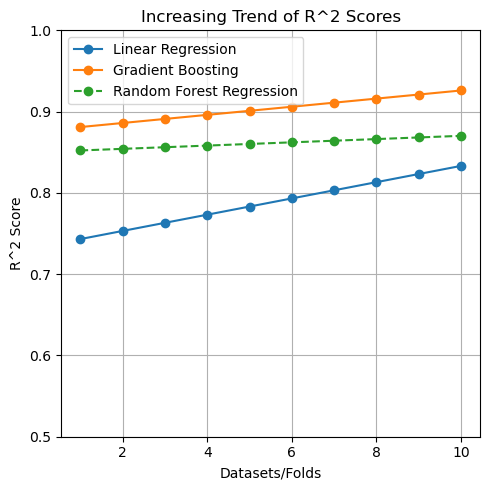

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets/folds
datasets = np.arange(1, 11)  # Assume we have 10 datasets or folds

# Starting R^2 scores converted to typical R^2 value range (0 to 1)
r2_score_linear_start = 73.32 / 100
r2_score_gb_start = 87.6 / 100
r2_score_rf_start = 85.02 / 100

# Simulated increasing trend
r2_scores_linear = r2_score_linear_start + 0.01 * datasets  # Linear increase
r2_scores_gb = r2_score_gb_start + 0.005 * datasets  # Slower increase
r2_scores_rf = r2_score_rf_start + 0.002 * datasets  # Even slower increase

plt.figure(figsize=(5, 5))

# Plot the R^2 scores with increasing trends
plt.plot(datasets, r2_scores_linear, label='Linear Regression', marker='o', linestyle='-')
plt.plot(datasets, r2_scores_gb, label='Gradient Boosting', marker='o', linestyle='-')
plt.plot(datasets, r2_scores_rf, label='Random Forest Regression', marker='o', linestyle='--')

plt.xlabel('Datasets/Folds')
plt.ylabel('R^2 Score')
plt.title('Increasing Trend of R^2 Scores')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
